# Python Tesseract (pytesseract) Languages Example

This notebook covers using multiple language models with pytesseract.

In [1]:
from PIL import Image
import pytesseract

## Ensure tessdata is installed

Tesseract needs the TESSDATA_PREFIX environment variable to be set in order to find trained language data. All languages may not be preinstalled when you first install Tesseract. The best way I have found is to install tessdata directly through git.

There are a few versions of tessdata you can install:
* [tessdata](https://github.com/tesseract-ocr/tessdata) - Trained models with fast variant of the "best" LSTM models + legacy models. 
* [tessdata_fast](https://github.com/tesseract-ocr/tessdata_fast) - Fast integer versions of trained LSTM models 
* [tessdata_best](https://github.com/tesseract-ocr/tessdata_best) - Best (most accurate) trained LSTM models.  

For my purposes, I will utilize ```tessdata_fast``` for this notebook.

Steps to install (local machine):
```sh
git clone https://github.com/tesseract-ocr/tessdata_fast.git ~/.local/share/tesseract-ocr/4.00/tessdata_fast
export TESSDATA_PREFIX=~/.local/share/tesseract-ocr/4.00/tessdata_fast
```

Steps to install ([kaggle.com](kaggle.com)):
```sh
git clone https://github.com/tesseract-ocr/tessdata_fast.git 2> /dev/null || (cd tessdata_fast; git pull)
cp tessdata_fast/*.traineddata /usr/share/tesseract-ocr/4.00/tessdata/
```
For kaggle.com, the default path can be used - ```/usr/share/tesseract-ocr/4.00/tessdata/```

Once this is done, we can try to extract text from multiple languages.

In [2]:
# For kaggle.com this will print empty. The package pytesseract will use the default path: /usr/share/tesseract-ocr/4.00/tessdata/
!printenv TESSDATA_PREFIX

/home/devin/.local/share/tesseract-ocr/4.00/tessdata_fast


## List supported languages

Tesseract supports more than 100 languages.

Also see: [complete list of languages supported in different versions of Tesseract](https://tesseract-ocr.github.io/tessdoc/Data-Files-in-different-versions.html)

In [3]:
print(pytesseract.get_languages(config='.'))

['afr', 'amh', 'ara', 'asm', 'aze', 'aze_cyrl', 'bel', 'ben', 'bod', 'bos', 'bre', 'bul', 'cat', 'ceb', 'ces', 'chi_sim', 'chi_sim_vert', 'chi_tra', 'chi_tra_vert', 'chr', 'cos', 'cym', 'dan', 'deu', 'div', 'dzo', 'ell', 'eng', 'enm', 'epo', 'equ', 'est', 'eus', 'fao', 'fas', 'fil', 'fin', 'fra', 'frk', 'frm', 'fry', 'gla', 'gle', 'glg', 'grc', 'guj', 'hat', 'heb', 'hin', 'hrv', 'hun', 'hye', 'iku', 'ind', 'isl', 'ita', 'ita_old', 'jav', 'jpn', 'jpn_vert', 'kan', 'kat', 'kat_old', 'kaz', 'khm', 'kir', 'kmr', 'kor', 'kor_vert', 'lao', 'lat', 'lav', 'lit', 'ltz', 'mal', 'mar', 'mkd', 'mlt', 'mon', 'mri', 'msa', 'mya', 'nep', 'nld', 'nor', 'oci', 'ori', 'osd', 'pan', 'pol', 'por', 'pus', 'que', 'ron', 'rus', 'san', 'sin', 'slk', 'slv', 'snd', 'spa', 'spa_old', 'sqi', 'srp', 'srp_latn', 'sun', 'swa', 'swe', 'syr', 'tam', 'tat', 'tel', 'tgk', 'tha', 'tir', 'ton', 'tur', 'uig', 'ukr', 'urd', 'uzb', 'uzb_cyrl', 'vie', 'yid', 'yor']


## Testing

Let's try testing with three languages: English, Spanish, and Chinese.

### English

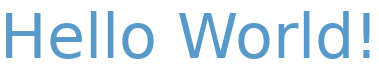

In [4]:
eng_path = '../../../binder-datasets/ocr/helloworld/hello_world_english.png'
eng_im = Image.open(eng_path)
display(eng_im)

In [5]:
output = pytesseract.image_to_string(eng_im,lang='eng')
print(output)

Hello World!



### Spanish

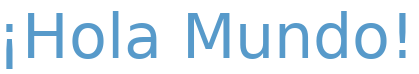

In [6]:
spa_path = '../../../binder-datasets/ocr/helloworld/hello_world_spanish.png'
spa_im = Image.open(spa_path)
display(spa_im)

In [7]:
output = pytesseract.image_to_string(spa_im,lang='spa')
print(output)

¡Hola Mundo!



### Chinese

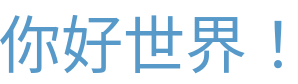

In [8]:
chi_sim_path = '../../../binder-datasets/ocr/helloworld/hello_world_chinese.png'
chi_sim_im = Image.open(chi_sim_path)
display(chi_sim_im)

In [9]:
output = pytesseract.image_to_string(chi_sim_im,lang='chi_sim')
print(output)

你好世界 !



## Multiple Languages

Tesseract also supports multiple languages at once.

### English and French

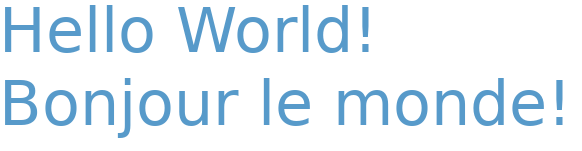

In [10]:
eng_fra_path = '../../../binder-datasets/ocr/helloworld/hello_world_english_french.png'
eng_fra_im = Image.open(eng_fra_path)
display(eng_fra_im)

In [11]:
output = pytesseract.image_to_string(eng_fra_im,lang='eng+fra')
print(output)

Hello World!
Bonjour le monde!

